In [2]:
import numpy as np
import pandas as pd

# Load in and visualize the data

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()
df.shape

(50000, 2)

# Data Processing — convert to lower case

In [4]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [5]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

# Data Processing — remove punctuation

In [6]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))

In [8]:
df['clean_text'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [9]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))

In [10]:
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


#  Data Processing — create list of reviews

In [11]:
all_text2 = df['clean_text'].tolist()

### Tokenize — Create Vocab to Int mapping dictionary

In [12]:
from collections import Counter
all_text2 = ' '.join(all_text2)
# create a list of words
words = all_text2.split()

In [13]:
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [14]:
total_words

11512912

In [15]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}

In [16]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [17]:
reviews_split = df['clean_text'].tolist()

##  Tokenize — Encode the words

In [18]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[28, 4, 1, 77, 1941, 44, 1063, 11, 100, 145, 40, 479, 3324, 393, 461, 26, 3190, 34, 23, 205, 14, 10, 6, 601, 48, 590, 15, 2137, 12, 1, 87, 146, 11, 3255, 69, 42, 3324, 13, 29, 5600, 2, 15378, 134, 4, 582, 61, 282, 7, 205, 35, 1, 670, 138, 1707, 69, 10, 6, 21, 3, 118, 16, 1, 8330, 5794, 39, 11861, 10, 118, 2508, 55, 6064, 15, 5636, 5, 1470, 381, 39, 582, 29, 6, 3407, 7, 1, 352, 340, 4, 1, 23503, 12, 8, 6, 469, 3324, 14, 11, 6, 1, 11516, 338, 5, 1, 16023, 6870, 2543, 1061, 61649, 8, 2637, 1375, 20, 25365, 536, 33, 4727, 2520, 4, 1, 1208, 112, 31, 1, 7153, 25, 2992, 13015, 2, 408, 61650, 37, 17529, 6, 21, 319, 20, 1, 5098, 3720, 536, 6, 344, 5, 81744, 8470, 41120, 15379, 5171, 7893, 2461, 2, 18404, 61651, 329, 9265, 7472, 13445, 2, 8721, 34936, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 668, 5, 1, 187, 11, 8, 262, 112, 77, 257, 548, 3001, 819, 178, 1271, 4349, 16, 2499, 1096, 819, 1412, 819, 81745, 148, 978, 181, 1, 87, 393, 9, 120, 201, 3255, 69, 14, 37, 1574, 8, 13

In [19]:
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


### Tokenize — Encode the labels

In [20]:
labels_split = df['sentiment'].tolist()

In [21]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

## Analyze Reviews Length

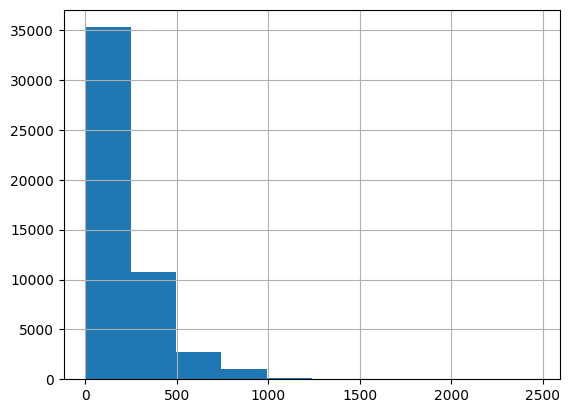

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

###  Removing Outliers — Getting rid of extremely long or short reviews

In [23]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

### Padding / Truncating the remaining data

In [24]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [25]:
features = pad_features(reviews_int,200)

In [26]:
print (features[:10,:])

[[   28     4     1 ...   978   181     1]
 [    0     0     0 ...  1900    73   223]
 [    0     0     0 ...    64    15   333]
 ...
 [    0     0     0 ...    20     1   946]
 [    0     0     0 ... 10151 45601    60]
 [    0     0     0 ...    12    79  1215]]


In [27]:
len_feat = len(features)
split_frac = 0.8

### Training, Validation, Test Dataset Split

In [28]:
split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [29]:
type(test_y)

list

In [30]:
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)

## Dataloaders and Batching

In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [32]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[ 2040,  2158, 35419,  ...,     1,   617,     6],
        [  161,    81,    10,  ...,    28,   838,   174],
        [    0,     0,     0,  ...,    56,     2,   547],
        ...,
        [    9,  2413,    22,  ...,    91,     4,   151],
        [    0,     0,     0,  ...,    20,     1,   946],
        [   10,  1372, 19399,  ..., 12876,    43,    10]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1])


## Define the LSTM Network Architecture


In [33]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (torch.cuda.is_available()):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

## Training the Network

## Instantiate the network

In [34]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [38]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

No GPU available, training on CPU.


## Training Loop
Most of the code in training loop is pretty standard Deep Learning training code that you might see often in all the implementations that’s using PyTorch framework.

In [39]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Training params
epochs = 2
counter = 0
print_every = 100
clip = 5  # Gradient clipping

# Metrics tracking
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Move model to GPU if available
if train_on_gpu:
    net.cuda()

net.train()
# Train for some number of epochs
for e in range(epochs):
    h = net.init_hidden(batch_size)
    epoch_train_loss = 0
    epoch_correct = 0
    total_samples = 0

    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])

        net.zero_grad()
        output, h = net(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # Track training loss and accuracy
        epoch_train_loss += loss.item()
        preds = torch.round(output.squeeze())
        correct_tensor = preds.eq(labels.float().view_as(preds))
        correct = correct_tensor.sum().item()
        epoch_correct += correct
        total_samples += labels.size(0)

        # Validation check
        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_loss_list = []
            val_correct = 0
            val_samples = 0
            net.eval()

            for val_inputs, val_labels in valid_loader:
                val_h = tuple([each.data for each in val_h])

                if train_on_gpu:
                    val_inputs, val_labels = val_inputs.cuda(), val_labels.cuda()

                val_output, val_h = net(val_inputs, val_h)
                v_loss = criterion(val_output.squeeze(), val_labels.float())
                val_loss_list.append(v_loss.item())

                val_preds = torch.round(val_output.squeeze())
                val_correct_tensor = val_preds.eq(val_labels.float().view_as(val_preds))
                val_correct += val_correct_tensor.sum().item()
                val_samples += val_labels.size(0)

            net.train()

            # Calculate average validation metrics
            avg_val_loss = np.mean(val_loss_list)
            val_accuracy = val_correct / val_samples
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)

            print("Epoch: {}/{}...".format(e + 1, epochs),
                  "Step: {}...".format(counter),
                  "Train Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}...".format(avg_val_loss),
                  "Val Accuracy: {:.3f}".format(val_accuracy))

    # Record epoch metrics
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_accuracy = epoch_correct / total_samples
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {e + 1}/{epochs} - Train Loss: {avg_train_loss:.6f}, Train Accuracy: {train_accuracy:.3f}")

# ✅ Save the trained model after finishing training
model_path = 'sentiment_rnn.pth'
torch.save({
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epochs
}, model_path)

print(f"Model saved to {model_path}")


Epoch: 1/2... Step: 100... Train Loss: 0.299352... Val Loss: 0.478708... Val Accuracy: 0.774
Epoch: 1/2... Step: 200... Train Loss: 0.402342... Val Loss: 0.417118... Val Accuracy: 0.815
Epoch: 1/2... Step: 300... Train Loss: 0.305105... Val Loss: 0.413093... Val Accuracy: 0.822
Epoch: 1/2... Step: 400... Train Loss: 0.315404... Val Loss: 0.399341... Val Accuracy: 0.821
Epoch: 1/2... Step: 500... Train Loss: 0.341445... Val Loss: 0.376315... Val Accuracy: 0.841
Epoch: 1/2... Step: 600... Train Loss: 0.345808... Val Loss: 0.370111... Val Accuracy: 0.839
Epoch: 1/2... Step: 700... Train Loss: 0.251694... Val Loss: 0.394143... Val Accuracy: 0.829
Epoch: 1/2... Step: 800... Train Loss: 0.389023... Val Loss: 0.359590... Val Accuracy: 0.844
Epoch 1/2 - Train Loss: 0.372502, Train Accuracy: 0.839
Epoch: 2/2... Step: 900... Train Loss: 0.280034... Val Loss: 0.359140... Val Accuracy: 0.846
Epoch: 2/2... Step: 1000... Train Loss: 0.252885... Val Loss: 0.362857... Val Accuracy: 0.851
Epoch: 2/2...

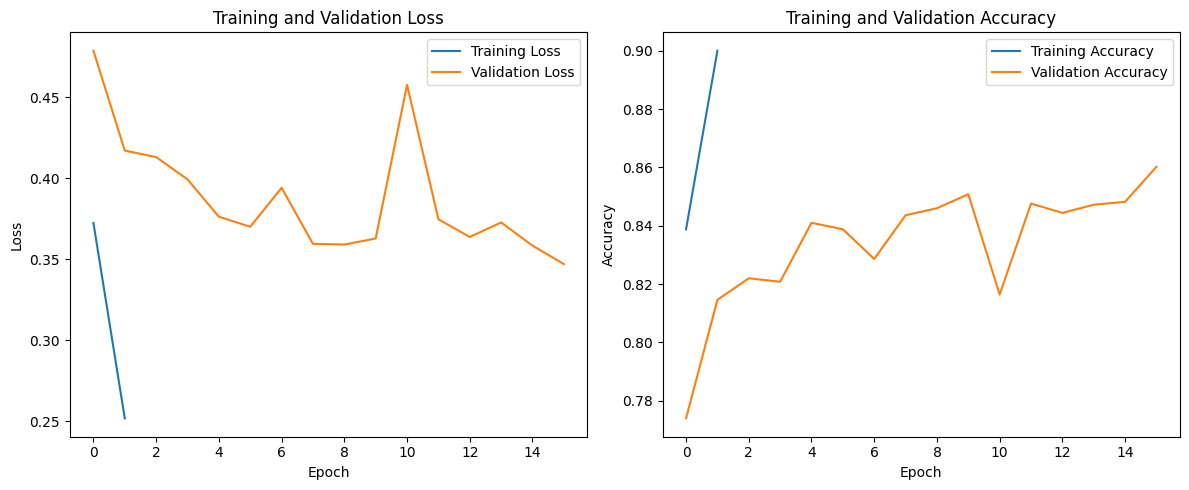

In [41]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



### Testing
- On Test Data

Test loss: 0.345
Test accuracy: 0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2530
           1       0.85      0.86      0.85      2470

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



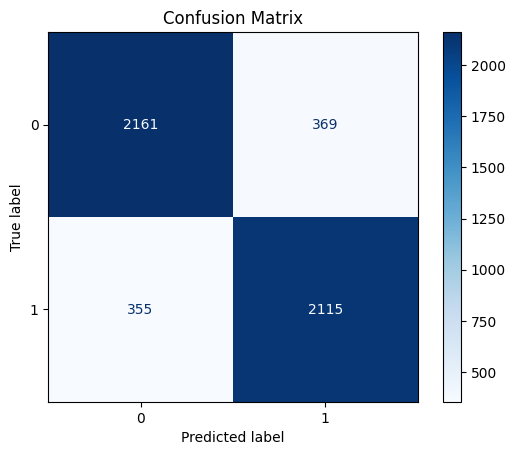

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch

# Track loss and predictions
test_losses = []  # track loss
num_correct = 0
all_preds = []
all_labels = []

# Initialize hidden state
h = net.init_hidden(batch_size)

net.eval()
# Iterate over test data
for inputs, labels in test_loader:
    h = tuple([each.data for each in h])  # Detach hidden state

    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()

    # Get predicted outputs
    output, h = net(inputs, h)

    # Calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # Convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # Rounds to the nearest integer

    # Store predictions and labels
    all_preds.extend(pred.detach().cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

    # Compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# -- Stats -- ##
# Average test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# Accuracy over all test data
test_acc = num_correct / len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Inference

In [44]:
import torch
import numpy as np

# Load your saved model
model_path = 'sentiment_rnn.pth'
checkpoint = torch.load(model_path)
net.load_state_dict(checkpoint['model_state_dict'])
net.eval()

# Move to GPU if available
if train_on_gpu:
    net.cuda()

# --- Preprocessing Function ---
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = [vocab_to_int[word] for word in word_list if word in vocab_to_int]
    return [num_list]  # Return as a list of lists (reviews)

# --- Padding Function ---
def pad_features(reviews_int, seq_length=200):
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    for i, row in enumerate(reviews_int):
        review_len = len(row)
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length - review_len))
            new = zeroes + row
        else:
            new = row[:seq_length]
        features[i, :] = np.array(new)
    return features

# --- Inference Function ---
def predict(net, test_review, vocab_to_int, seq_length=200):
    # Preprocess review
    int_review = preprocess(test_review, vocab_to_int)
    features = pad_features(int_review, seq_length=seq_length)
    features = torch.from_numpy(features)

    # Initialize hidden state
    net.eval()
    val_h = net.init_hidden(1)  # batch size of 1 for single review
    val_h = tuple([each.data for each in val_h])

    # Move to GPU if available
    if train_on_gpu:
        features = features.cuda()

    # Forward pass to get predictions
    output, val_h = net(features, val_h)

    # Apply sigmoid activation to get sentiment score between 0 and 1
    sentiment_score = torch.sigmoid(output).item()

    # Convert score to sentiment prediction
    sentiment = "Positive" if sentiment_score >= 0.5 else "Negative"

    return sentiment, sentiment_score

# --- Example Usage ---
# Assuming 'vocab_to_int' is your pre-built vocabulary dictionary
# Example review input
test_review = "The movie was absolutely fantastic and thrilling!"

# Get prediction
sentiment, score = predict(net, test_review, vocab_to_int)
print(f"Sentiment: {sentiment}")
print(f"Sentiment Score: {score:.4f}")


/var/folders/d_/hbbmyzcj0pgdfpjpqk7j47cm0000gn/T/ipykernel_71603/2429805742.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Sentiment: Positive
Sentiment Score: 0.6369
